# Chapter 1: Computing with Python

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.apress.com/us/book/9781484242452) (ISBN 978-1-484242-45-2).

## Interpreter

In [1]:
%%writefile hello.py
print("Hello from Python!")

Overwriting hello.py


In [2]:
!python hello.py

Hello from Python!


In [3]:
!python --version

Python 3.7.3


## Input and output caching

In [1]:
3 * 3

9

In [2]:
In[1]

'3 * 3'

In [3]:
Out[1]

9

In [4]:
In

['', '3 * 3', 'In[1]', 'Out[1]', 'In']

In [5]:
Out

{1: 9, 2: '3 * 3', 3: 9, 4: ['', '3 * 3', 'In[1]', 'Out[1]', 'In', 'Out']}

In [6]:
1+2

3

In [7]:
1+2;

In [8]:
x = 1

In [9]:
x = 2; x

2

## Documentation

In [10]:
import os

In [11]:
# try os.w<TAB>

In [12]:
import math

In [13]:
math.cos?

Docstring:
cos(x)

Return the cosine of x (measured in radians).
Type:      builtin_function_or_method


## Interaction with System Shell

In [14]:
!touch file1.py file2.py file3.py

In [15]:
!ls file*

file1.py file2.py file3.py


In [16]:
files = !ls file*

In [17]:
len(files)

3

In [18]:
files

['file1.py', 'file2.py', 'file3.py']

In [19]:
file = "file1.py"

In [20]:
!ls -l $file

-rw-r--r--  1 rob  staff  0 May  6 12:30 file1.py


## Running scripts from the IPython console

In [21]:
%%writefile fib.py

def fib(N): 
    """ 
    Return a list of the first N Fibonacci numbers.
    """ 
    f0, f1 = 0, 1
    f = [1] * N
    for n in range(1, N):
        f[n] = f0 + f1
        f0, f1 = f1, f[n]

    return f

print(fib(10))

Overwriting fib.py


In [22]:
!python fib.py

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [23]:
%run fib.py

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [24]:
fib(6)

[1, 1, 2, 3, 5, 8]

## Debugger

In [25]:
fib(1.0)

TypeError: can't multiply sequence by non-int of type 'float'

In [26]:
%debug

> /Users/rob/Desktop/numerical-python-apress-revision/numerical-python-book-code/fib.py(7)fib()
      5     """ 
      6     f0, f1 = 0, 1
----> 7     f = [1] * N
      8     for n in range(1, N):
      9         f[n] = f0 + f1



ipdb>  q


## Timing and profiling code

In [27]:
%timeit fib(100)

12.5 µs ± 712 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
result = %time fib(100)

CPU times: user 21 µs, sys: 1 µs, total: 22 µs
Wall time: 27.2 µs


In [29]:
len(result)

100

In [30]:
import numpy as np

def random_walker_max_distance(M, N):
    """
    Simulate N random walkers taking M steps, and return the largest distance
    from the starting point achieved by any of the random walkers.
    """
    trajectories = [np.random.randn(M).cumsum() for _ in range(N)]
    return np.max(np.abs(trajectories))

In [31]:
%prun random_walker_max_distance(400, 10000)

         20010 function calls in 0.353 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.194    0.000    0.194    0.000 {method 'randn' of 'mtrand.RandomState' objects}
    10000    0.069    0.000    0.069    0.000 {method 'cumsum' of 'numpy.ndarray' objects}
        1    0.054    0.054    0.340    0.340 <ipython-input-30-a0ebffe020ed>:3(random_walker_max_distance)
        1    0.019    0.019    0.282    0.282 <ipython-input-30-a0ebffe020ed>:8(<listcomp>)
        1    0.013    0.013    0.353    0.353 <string>:1(<module>)
        1    0.004    0.004    0.004    0.004 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.004    0.004 fromnumeric.py:69(_wrapreduction)
        1    0.000    0.000    0.353    0.353 {built-in method builtins.exec}
        1    0.000    0.000    0.004    0.004 fromnumeric.py:2397(amax)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:70(<dictcomp>)
  

## Jupyter notebook

In [32]:
from IPython.display import display, Image, HTML, Math

In [33]:
Image(url='http://python.org/images/python-logo.gif')

In [34]:
import scipy, numpy, matplotlib
modules = [numpy, matplotlib, scipy]
row = "<tr> <td>%s</td> <td>%s</td> </tr>"
rows = "\n".join([row % (module.__name__, module.__version__) for module in modules])
s = "<table> <tr><th>Library</th><th>Version</th> </tr> %s</table>" % rows

In [35]:
s

'<table> <tr><th>Library</th><th>Version</th> </tr> <tr> <td>numpy</td> <td>1.13.3</td> </tr>\n<tr> <td>matplotlib</td> <td>3.0.0</td> </tr>\n<tr> <td>scipy</td> <td>1.1.0</td> </tr></table>'

In [36]:
HTML(s)

Library,Version
numpy,1.13.3
matplotlib,3.0.0
scipy,1.1.0


In [37]:
class HTMLDisplayer(object):
    def __init__(self, code):
        self.code = code
    
    def _repr_html_(self):
        return self.code

In [38]:
HTMLDisplayer(s)

Library,Version
numpy,1.13.3
matplotlib,3.0.0
scipy,1.1.0


In [39]:
Math(r'\hat{H} = -\frac{1}{2}\epsilon \hat{\sigma}_z-\frac{1}{2}\delta \hat{\sigma}_x')

<IPython.core.display.Math object>

In [40]:
class QubitHamiltonian(object):
    def __init__(self, epsilon, delta):
        self.epsilon = epsilon
        self.delta = delta

    def _repr_latex_(self):
        return "$\hat{H} = -%.2f\hat{\sigma}_z-%.2f\hat{\sigma}_x$" % \
            (self.epsilon/2, self.delta/2)

In [41]:
QubitHamiltonian(0.5, 0.25)

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def f(mu):
    X = stats.norm(loc=mu, scale=np.sqrt(mu))
    N = stats.poisson(mu)
    x = np.linspace(0, X.ppf(0.999))
    n = np.arange(0, x[-1])

    fig, ax = plt.subplots()
    ax.plot(x, X.pdf(x), color='black', lw=2, label="Normal($\mu=%d, \sigma^2=%d$)" % (mu, mu))
    ax.bar(n, N.pmf(n), align='edge', label=r"Poisson($\lambda=%d$)" % mu)
    ax.set_ylim(0, X.pdf(x).max() * 1.25)
    ax.legend(loc=2, ncol=2)
    plt.close(fig)
    return fig

In [43]:
from ipywidgets import interact
import ipywidgets as widgets

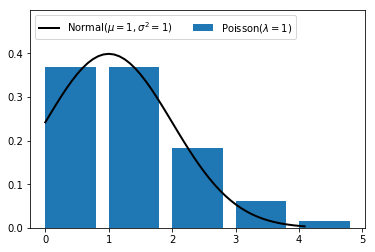

In [44]:
interact(f, mu=widgets.FloatSlider(min=1.0, max=20.0, step=1.0));

## Jupyter nbconvert

In [45]:
!ipython nbconvert --to html ch01-code-listing.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook ch01-code-listing.ipynb to html
[NbConvertApp] Writing 315769 bytes to ch01-code-listing.html


In [46]:
!ipython nbconvert --to pdf ch01-code-listing.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook ch01-code-listing.ipynb to pdf
[NbConvertApp] Support files will be in ch01-code-listing_files/
[NbConvertApp] Making directory ch01-code-listing_files
[NbConvertApp] Writing 42308 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex']
[NbConvertApp] CRITICAL | xelatex failed: ['xelatex', 'notebook.tex']
This is XeTeX, Version 3.14159265-2.6-0.99999 (TeX Live 2018) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./notebook.tex
LaTeX2e <2018-04-01> patch level 2
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class


In [47]:
%%writefile custom_template.tplx
((*- extends 'article.tplx' -*))

((* block title *)) \title{Document title} ((* endblock title *))
((* block author *)) \author{Author's Name} ((* endblock author *))

Overwriting custom_template.tplx


In [48]:
!ipython nbconvert ch01-code-listing.ipynb --to pdf --template custom_template.tplx

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook ch01-code-listing.ipynb to pdf
[NbConvertApp] Support files will be in ch01-code-listing_files/
[NbConvertApp] Making directory ch01-code-listing_files
[NbConvertApp] Writing 42331 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex']
[NbConvertApp] CRITICAL | xelatex failed: ['xelatex', 'notebook.tex']
This is XeTeX, Version 3.14159265-2.6-0.99999 (TeX Live 2018) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./notebook.tex
LaTeX2e <2018-04-01> patch level 2
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class


In [49]:
!ipython nbconvert ch01-code-listing.ipynb --to python

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook ch01-code-listing.ipynb to python
[NbConvertApp] Writing 5081 bytes to ch01-code-listing.py


# Versions

In [50]:
%reload_ext version_information
%version_information numpy

Software versions
Python 3.6.6 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.5.0
OS Darwin 17.3.0 x86_64 i386 64bit
numpy 1.13.3
Tue Oct 02 06:08:48 2018 JST